In [1]:
import sys
sys.path.append('..')

from train_config.dataset import Dataset

In [2]:
import os
os.environ['SIIM_ACR_PNEUMOTORAX_SEGMENTATION_DATASET'] = r"C:\workspace\datasets\SIIM-ACR_Pneumothorax_Segmentation"

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

def viz_hist(analysing_dataset: Dataset) -> []:
    labels = []
    for item in analysing_dataset.get_items():
        if item[1] == -1:
            labels.append(0)
            continue

        labels.append(len(item[1]))
            
    print('Label values', set(labels))
    positives_cnt = np.count_nonzero(np.array(labels))
    if positives_cnt < len(labels):
        print('Negative:', len(labels) - positives_cnt, 'positive:', positives_cnt, 'ratio:', positives_cnt / (len(labels) - positives_cnt))

    plt.hist(labels)
    plt.grid()
    plt.yscale('log')
    plt.show()

# Analyse classification dataset

Overall images num: 10675
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 10}
Negative: 8296 positive: 2379 ratio: 0.2867647058823529


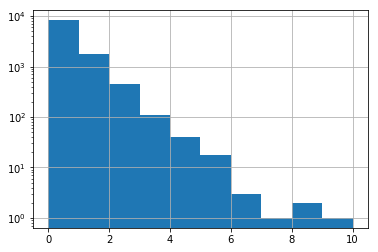

In [4]:
dataset = Dataset(is_test=False, include_negatives=True)
print("Overall images num: {}".format(len(dataset.get_items())))
viz_hist(dataset)

# Analyse segmentation dataset

Overall images num: 2379
Label values {1, 2, 3, 4, 5, 6, 7, 8, 10}


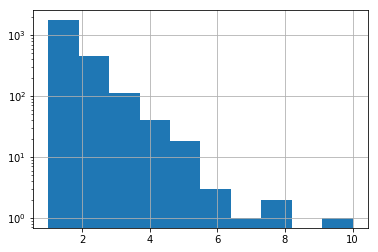

In [5]:
dataset = Dataset(is_test=False, include_negatives=False)
print("Overall images num: {}".format(len(dataset.get_items())))
viz_hist(dataset)

# Analyse data sizes

{1024}


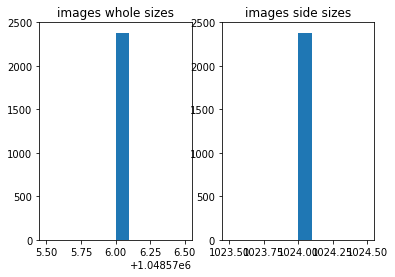

In [6]:
images_side_sizes = []
images_sizes = []

for it in dataset:
    images_side_sizes.append(it['data'].shape[0])
    images_sizes.append(it['data'].shape[0] * it['data'].shape[1])

print(set(images_side_sizes))
fig, axs = plt.subplots(1,2)
axs[0].hist(images_sizes)
axs[0].set_title('images whole sizes')
axs[1].hist(images_side_sizes)
axs[1].set_title('images side sizes')
plt.show()

# Classification dataset analysis

### Analyse class dataset train part

3325
Label values {0, 1, 2, 3, 4, 5, 6, 8}
Negative: 1664 positive: 1661 ratio: 0.9981971153846154


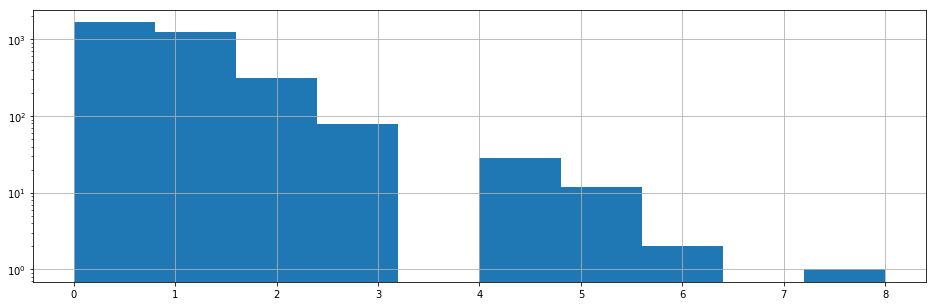

In [7]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

train_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/train_class.npy', remove_unused=True)
print(len(train_dataset))

viz_hist(train_dataset)

### Analyse class dataset validation part

948
Label values {0, 1, 2, 3, 4, 5}
Negative: 475 positive: 473 ratio: 0.9957894736842106


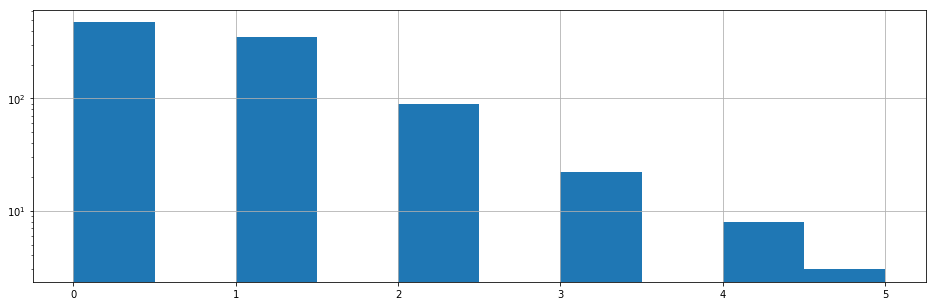

In [8]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/val_class.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)

### Analyse class dataset test part

472
Label values {0, 1, 2, 3, 4, 5}
Negative: 237 positive: 235 ratio: 0.9915611814345991


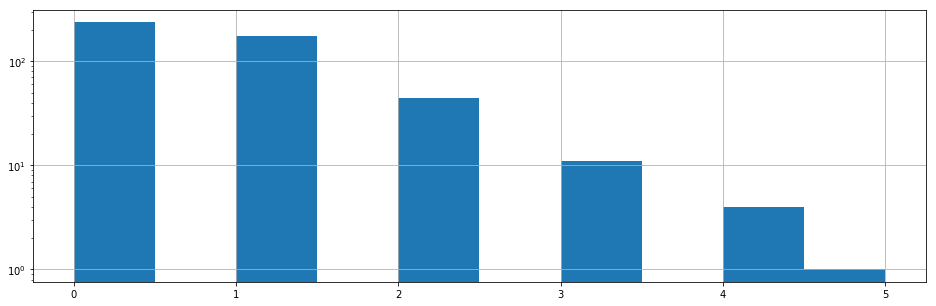

In [9]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/test_class.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)

# Segmentation dataset analysis

### Analyse class dataset train part

869
Label values {1, 2, 3, 4, 5, 6, 8}


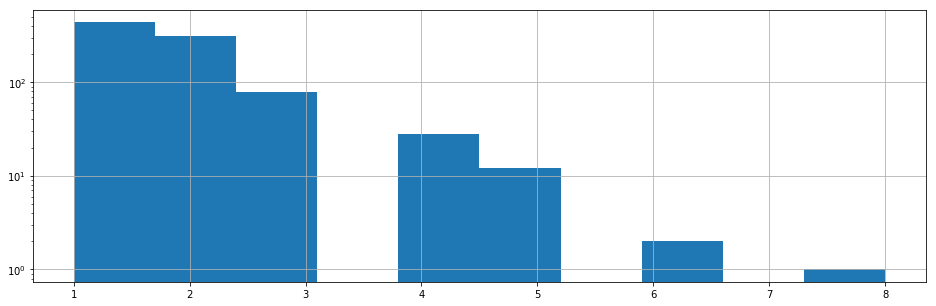

In [10]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

train_dataset = Dataset(is_test=False, include_negatives=False).load_indices('../data/indices/train_seg.npy', remove_unused=True)
print(len(train_dataset))

viz_hist(train_dataset)

### Analyse class dataset validation part

246
Label values {1, 2, 3, 4, 5}


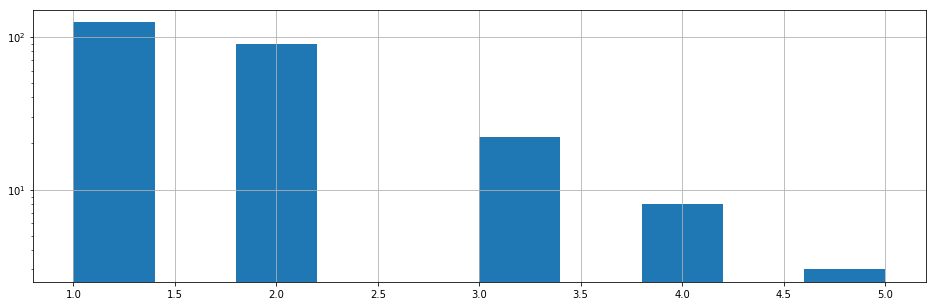

In [11]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=False).load_indices('../data/indices/val_seg.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)


### Analyse class dataset test part

122
Label values {1, 2, 3, 4, 5}


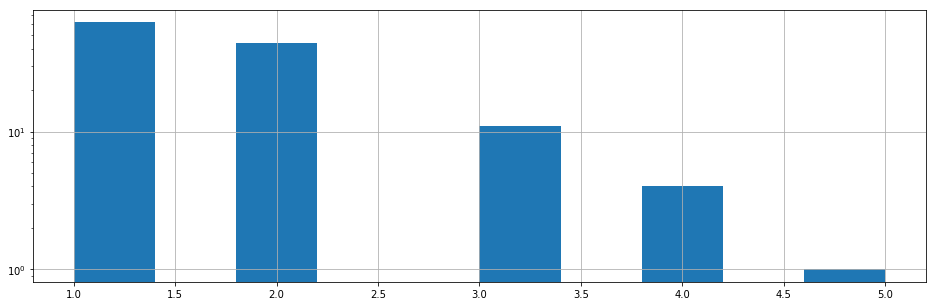

In [12]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=False).load_indices('../data/indices/test_seg.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)